In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
data = pd.read_csv("../cleaned_dataset.csv")

In [3]:
data.shape

(894, 14)

In [4]:
data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [5]:
cor_matrix = data.corr().abs().sort_values("Calories", ascending = False).sort_values("Calories", axis = 1, ascending = False)
cor_matrix

,Calories,TotalDistance,VeryActiveMinutes,TotalSteps,VeryActiveDistance,Id,LightActiveDistance,FairlyActiveMinutes,LightlyActiveMinutes,LoggedActivitiesDistance,ModeratelyActiveDistance,SedentaryMinutes,SedentaryActiveDistance
Calories,1.000000,0.634597,0.612108,0.576692,0.485477,0.452192,0.439143,0.279543,0.236113,0.206192,0.196670,0.062328,0.035224
TotalDistance,0.634597,1.000000,0.676779,0.983930,0.801608,0.305029,0.617964,0.441858,0.447825,0.185493,0.452468,0.211014,0.070356
VeryActiveMinutes,0.612108,0.676779,1.000000,0.663672,0.823507,0.333554,0.109564,0.296584,0.007386,0.231318,0.208591,0.127621,0.001012
TotalSteps,0.576692,0.983930,0.663672,1.000000,0.746909,0.250964,0.647993,0.480344,0.502734,0.179211,0.491803,0.249151,0.057076
VeryActiveDistance,0.485477,0.801608,0.823507,0.746909,1.000000,0.335490,0.119483,0.195911,0.009283,0.147102,0.177637,0.022772,0.040132
Id,0.452192,0.305029,0.333554,0.250964,0.335490,1.000000,0.075902,0.074040,0.050738,0.197578,0.047526,0.091396,0.009312
LightActiveDistance,0.439143,0.617964,0.109564,0.647993,0.119483,0.075902,1.000000,0.177579,0.866208,0.133221,0.199983,0.339955,0.087422
FairlyActiveMinutes,0.279543,0.441858,0.296584,0.480344,0.195911,0.074040,0.177579,1.000000,0.096199,0.048375,0.945749,0.203648,0.030405
LightlyActiveMinutes,0.236113,0.447825,0.007386,0.502734,0.009283,0.050738,0.866208,0.096199,1.000000,0.094229,0.114369,0.361138,0.113978
LoggedActivitiesDistance,0.206192,0.185493,0.231318,0.179211,0.147102,0.197578,0.133221,0.048375,0.094229,1.000000,0.071574,0.036783,0.153340


In [6]:
max_corr = cor_matrix.Calories[1:].sort_values(ascending = False)
max_corr

TotalDistance               0.634597
VeryActiveMinutes           0.612108
TotalSteps                  0.576692
VeryActiveDistance          0.485477
Id                          0.452192
LightActiveDistance         0.439143
FairlyActiveMinutes         0.279543
LightlyActiveMinutes        0.236113
LoggedActivitiesDistance    0.206192
ModeratelyActiveDistance    0.196670
SedentaryMinutes            0.062328
SedentaryActiveDistance     0.035224
Name: Calories, dtype: float64

'TotalDistance', 'VeryActiveMinutes', 'TotalSteps', 'VeryActiveDistance' and 'LightActiveDistance' are the five most correlated predictors with 'Calories';

In [7]:
max_corr.index[1:6]

Index(['VeryActiveMinutes', 'TotalSteps', 'VeryActiveDistance', 'Id',
       'LightActiveDistance'],
      dtype='object')

In [8]:
X = data.iloc[:,1:-1]
y = data.iloc[:,-1]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Using highest 5 correlated

In [10]:
x1_train = X_train[['TotalDistance', 'VeryActiveMinutes', 'TotalSteps',
       'VeryActiveDistance', 'LightActiveDistance']]
x1_train = sm.add_constant(x1_train)
x1_test = X_test[['TotalDistance', 'VeryActiveMinutes', 'TotalSteps',
       'VeryActiveDistance', 'LightActiveDistance']]
x1_test = sm.add_constant(x1_test)

In [11]:
# Fit and summarize OLS model
mod = sm.OLS(endog = y_train, exog = x1_train)
res = mod.fit()

y_pred = res.predict(x1_test)
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     424.5
Date:                Thu, 04 Feb 2021   Prob (F-statistic):          2.11e-210
Time:                        14:42:14   Log-Likelihood:                -5221.9
No. Observations:                 715   AIC:                         1.046e+04
Df Residuals:                     709   BIC:                         1.048e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1671.5228    

[(0.0, 4500.0), (0.0, 4500.0)]

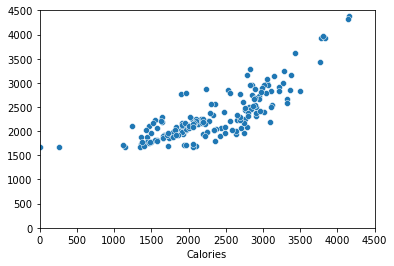

In [12]:
ax = sns.scatterplot(x=y_test, y=y_pred)
ax.set(ylim =[0,4500],xlim =[0,4500])

In [13]:
print("Train MSE:", mean_squared_error(y_train,res.fittedvalues)) 
print("Train R^2:", res.rsquared)
print("Test MSE:", mean_squared_error(y_test,y_pred)) 
print("Test R^2:", r2_score(y_test,y_pred))

Train MSE: 129171.75736373846
Train R^2: 0.7496115110664563
Test MSE: 164967.54011003446
Test R^2: 0.6624702349816908


## Removing correletion pairs >= 0.9

In [14]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
to_drop

['TotalSteps', 'ModeratelyActiveDistance']

In [15]:
max_corr.index.drop(to_drop).drop(['Id'])[:5]

Index(['TotalDistance', 'VeryActiveMinutes', 'VeryActiveDistance',
       'LightActiveDistance', 'FairlyActiveMinutes'],
      dtype='object')

In [16]:
x2_train = X_train[['TotalDistance', 'VeryActiveMinutes', 'VeryActiveDistance',
                 'LightActiveDistance', 'FairlyActiveMinutes']]
x2_train = sm.add_constant(x2_train)
x2_test = X_test[['TotalDistance', 'VeryActiveMinutes', 'VeryActiveDistance',
                  'LightActiveDistance', 'FairlyActiveMinutes']]
x2_test = sm.add_constant(x2_test)

In [17]:
# Fit and summarize OLS model
mod = sm.OLS(endog = y_train, exog = x2_train)
res = mod.fit()

y_pred = res.predict(x2_test)
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     180.1
Date:                Thu, 04 Feb 2021   Prob (F-statistic):          1.31e-123
Time:                        14:42:15   Log-Likelihood:                -5423.9
No. Observations:                 715   AIC:                         1.086e+04
Df Residuals:                     709   BIC:                         1.089e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1531.6597    

[(0.0, 4500.0), (0.0, 4500.0)]

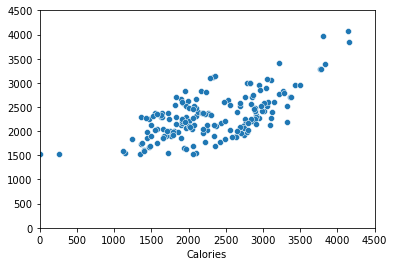

In [18]:
ax = sns.scatterplot(x=y_test, y=y_pred)
ax.set(ylim =[0,4500],xlim =[0,4500])

In [19]:
print("Train MSE:", mean_squared_error(y_train,res.fittedvalues)) 
print("Train R^2:", res.rsquared)
print("Test MSE:", mean_squared_error(y_test,y_pred)) 
print("Test R^2:", r2_score(y_test,y_pred))

Train MSE: 227266.84619969272
Train R^2: 0.5594625066190535
Test MSE: 263348.5977387577
Test R^2: 0.46117890675113893


## Removing correletion pairs >= 0.8

In [20]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
to_drop

['TotalSteps',
 'VeryActiveDistance',
 'LightlyActiveMinutes',
 'ModeratelyActiveDistance']

In [21]:
max_corr.index.drop(to_drop).drop(['Id'])[:5]

Index(['TotalDistance', 'VeryActiveMinutes', 'LightActiveDistance',
       'FairlyActiveMinutes', 'LoggedActivitiesDistance'],
      dtype='object')

In [22]:
x3_train = X_train[['TotalDistance', 'VeryActiveMinutes', 'LightActiveDistance',
       'FairlyActiveMinutes', 'LoggedActivitiesDistance']]
x3_train = sm.add_constant(x3_train)
x3_test = X_test[['TotalDistance', 'VeryActiveMinutes', 'LightActiveDistance',
       'FairlyActiveMinutes', 'LoggedActivitiesDistance']]
x3_test = sm.add_constant(x3_test)

In [23]:
# Fit and summarize OLS model
mod = sm.OLS(endog = y_train, exog = x3_train)
res = mod.fit()

y_pred = res.predict(x3_test)
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     170.8
Date:                Thu, 04 Feb 2021   Prob (F-statistic):          4.14e-119
Time:                        14:42:16   Log-Likelihood:                -5434.4
No. Observations:                 715   AIC:                         1.088e+04
Df Residuals:                     709   BIC:                         1.091e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

[(0.0, 4500.0), (0.0, 4500.0)]

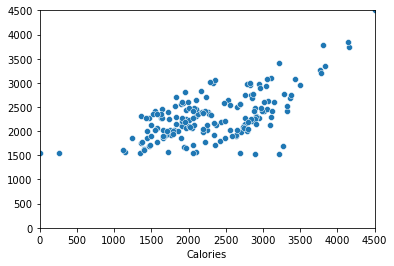

In [24]:
ax = sns.scatterplot(x=y_test, y=y_pred)
ax.set(ylim =[0,4500],xlim =[0,4500])

In [25]:
print("Train MSE:", mean_squared_error(y_train,res.fittedvalues)) 
print("Train R^2:", res.rsquared)
print("Test MSE:", mean_squared_error(y_test,y_pred)) 
print("Test R^2:", r2_score(y_test,y_pred))

Train MSE: 234029.0969862007
Train R^2: 0.546354457376869
Test MSE: 296954.74797687674
Test R^2: 0.3924194648301621
